 Let's break down **oversampling** — the magical trick that helps your model **learn better from small or imbalanced datasets** — in a way that’s as simple as explaining it to a 5-year-old 🎈, while still diving deep enough that even the **last atom is not left undefined** ⚛️.

---

# 🔄 What is **Oversampling**?

---

## 👶 Baby Definition:

> **Oversampling** means **making more copies of rare things** so the model can notice them better.

Imagine you're training a robot 🦾 to recognize animals. You have:

* 🐶 1000 photos of dogs
* 🐱 Only 50 photos of cats

The robot will learn a lot about dogs 🐶, but barely anything about cats 🐱.

So what do you do?

👉 You **make extra copies of cat images** (real or slightly modified) so the robot sees cats more often while training.

That’s **oversampling**.

---

## 🧠 Why Oversampling Is Needed

In **imbalanced datasets**, some classes (labels) appear much less than others.

| Example Problem      | Class 0 (Normal) | Class 1 (Anomaly) |
| -------------------- | ---------------- | ----------------- |
| Fraud Detection 💳   | 99,000 samples   | 100 samples       |
| Disease Detection 🧬 | 9,000 healthy    | 100 sick          |
| Spam Emails 📧       | 950 ham          | 50 spam           |

In these cases, the model gets **biased** toward the majority class because it sees it more.

📉 Result without fixing:

* Always predicts majority class
* **Very high accuracy**, but **useless model**

---

## 🔄 How Oversampling Fixes This

Oversampling means:

* **Adding more of the minority class** to the training data
* Balancing the number of samples in each class

Now the model sees **both classes equally** and can learn **better patterns**.

---

## 🎨 Two Main Types of Oversampling

### 1. 🔁 **Random Oversampling**

* Just **duplicate** the minority class samples.
* Simple but can lead to **overfitting** (same data repeated).

```python
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)
```

---

### 2. 🧠 **SMOTE (Synthetic Minority Over-sampling Technique)**

* Instead of copying, it **creates new synthetic examples** of the minority class by **interpolating** between nearby points.
* More realistic and **reduces overfitting**.

```python
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
```

---

## 🧪 Analogy Time: Cupcake Shop 🍰

You have:

* 100 vanilla cupcakes
* 10 chocolate ones

Customers (your model) only learn about vanilla. So:

* **Random Oversampling**: Just bake **90 more of the same chocolate cupcakes**.
* **SMOTE**: Create **90 new chocolate cupcakes**, but each with a **slightly different swirl, icing, or wrapper**.

Now customers can learn to recognize both types of cupcakes equally!

---

## ⚖️ Oversampling vs Undersampling

| Technique         | What It Does                    | Risk                    |
| ----------------- | ------------------------------- | ----------------------- |
| **Oversampling**  | Add more minority class samples | Overfitting if repeated |
| **Undersampling** | Remove majority class samples   | Loss of data, underfit  |

> ✅ Often we use **oversampling + undersampling together** to balance wisely.

---

## 📊 Visualization

Before:

```
Class 0: ● ● ● ● ● ● ● ● ● ● ● ● ● ● ●
Class 1: ◉ ◉
```

After Random Oversampling:

```
Class 0: ● ● ● ● ● ● ● ● ● ● ● ● ● ● ●
Class 1: ◉ ◉ ◉ ◉ ◉ ◉ ◉ ◉ ◉ ◉ ◉ ◉ ◉ ◉ ◉
```

---

## 🧠 TL;DR Summary

| Term         | Meaning                                        |
| ------------ | ---------------------------------------------- |
| Oversampling | Add more samples to the **minority class**     |
| Why          | So model **doesn’t ignore rare cases**         |
| How          | Random copy or generate fake data (like SMOTE) |
| Goal         | Balance class distribution for better learning |
| Tool         | `imblearn` library in Python                   |

---


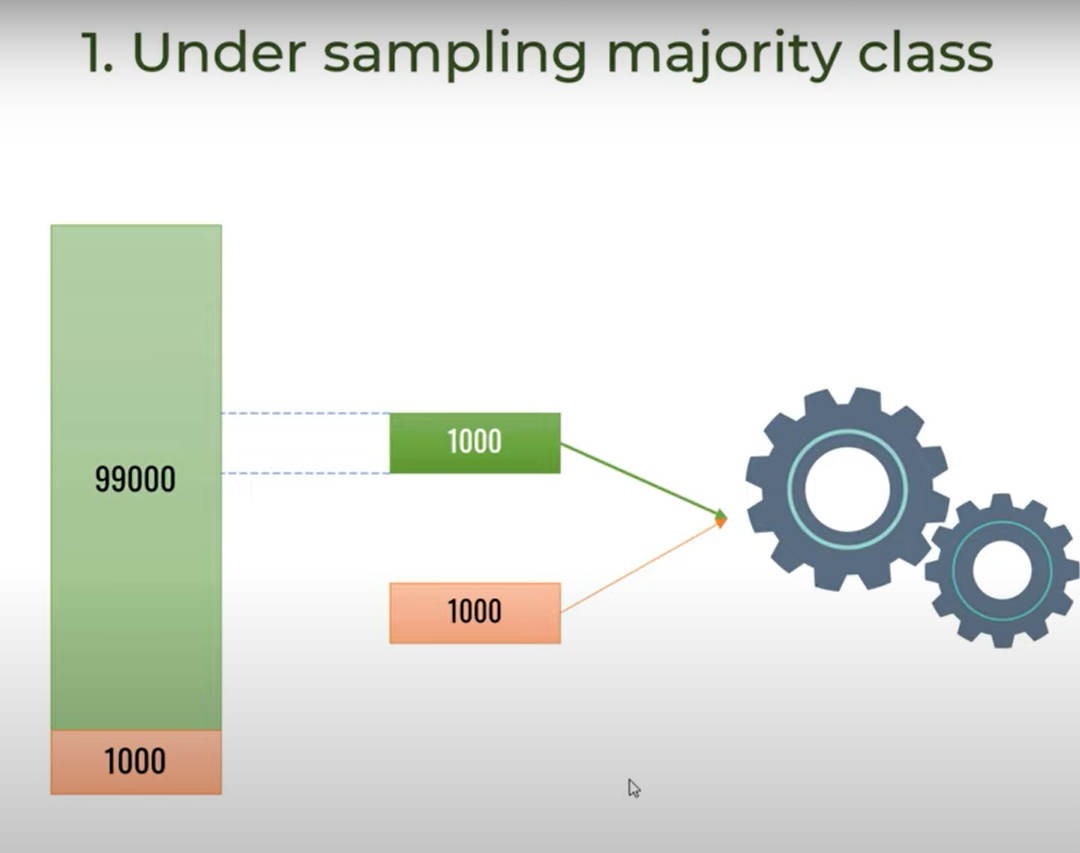
### You can take 1000 random samples from the majority class and also from minority but this is not the best way
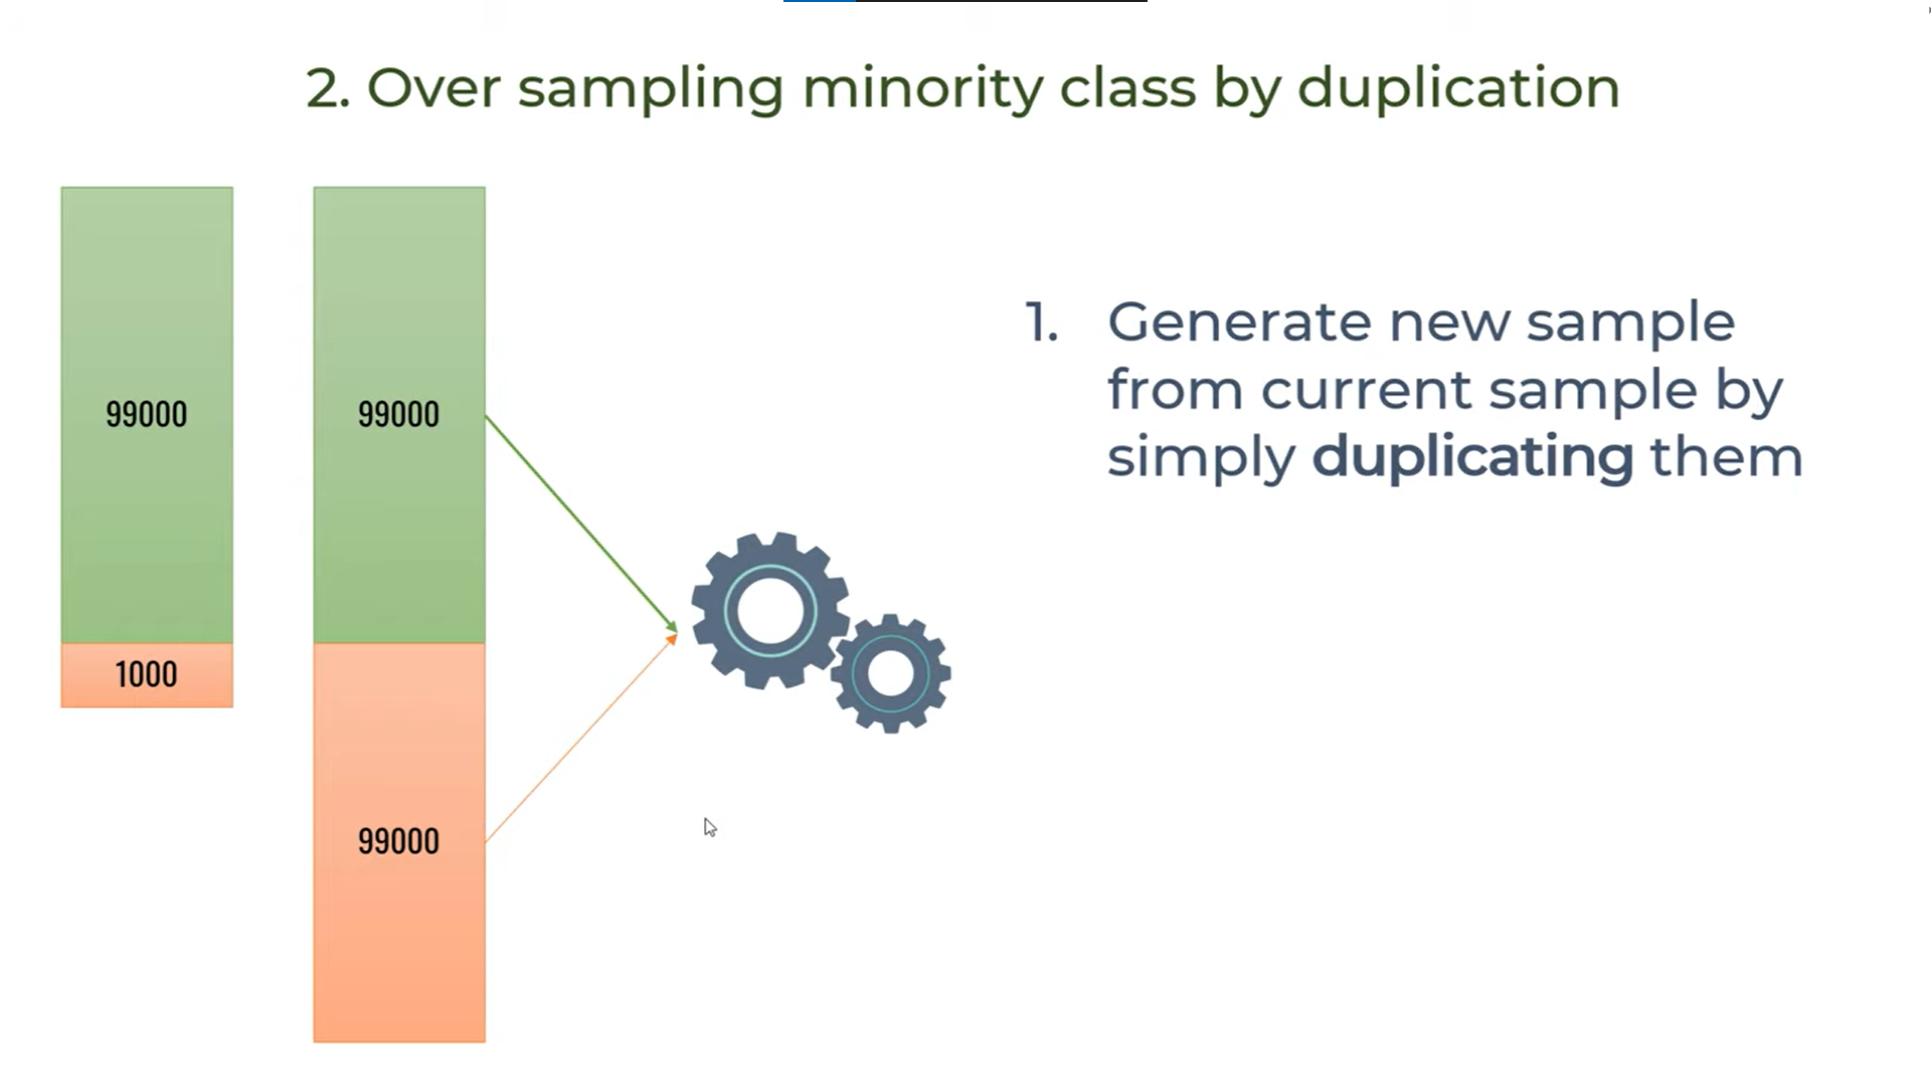
### In this we oversample the minority so it will become commom for the model
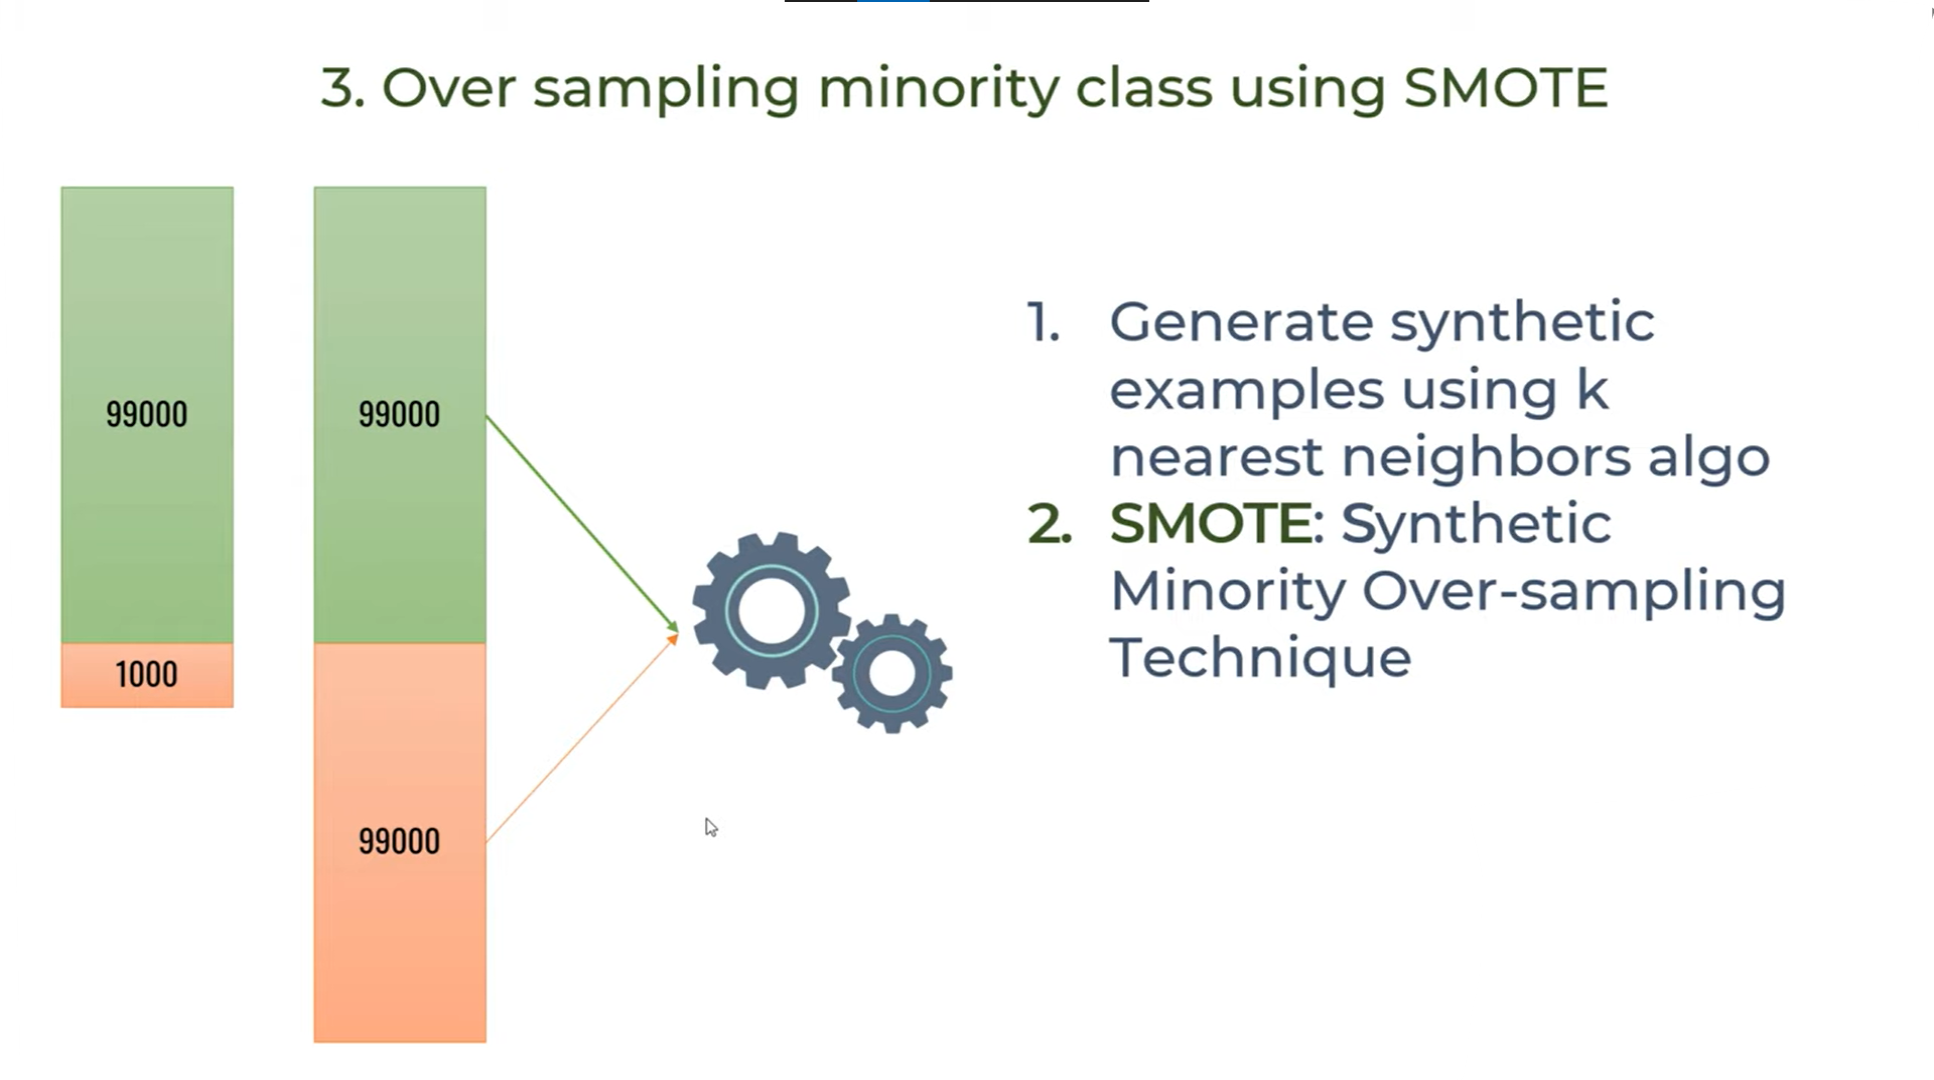
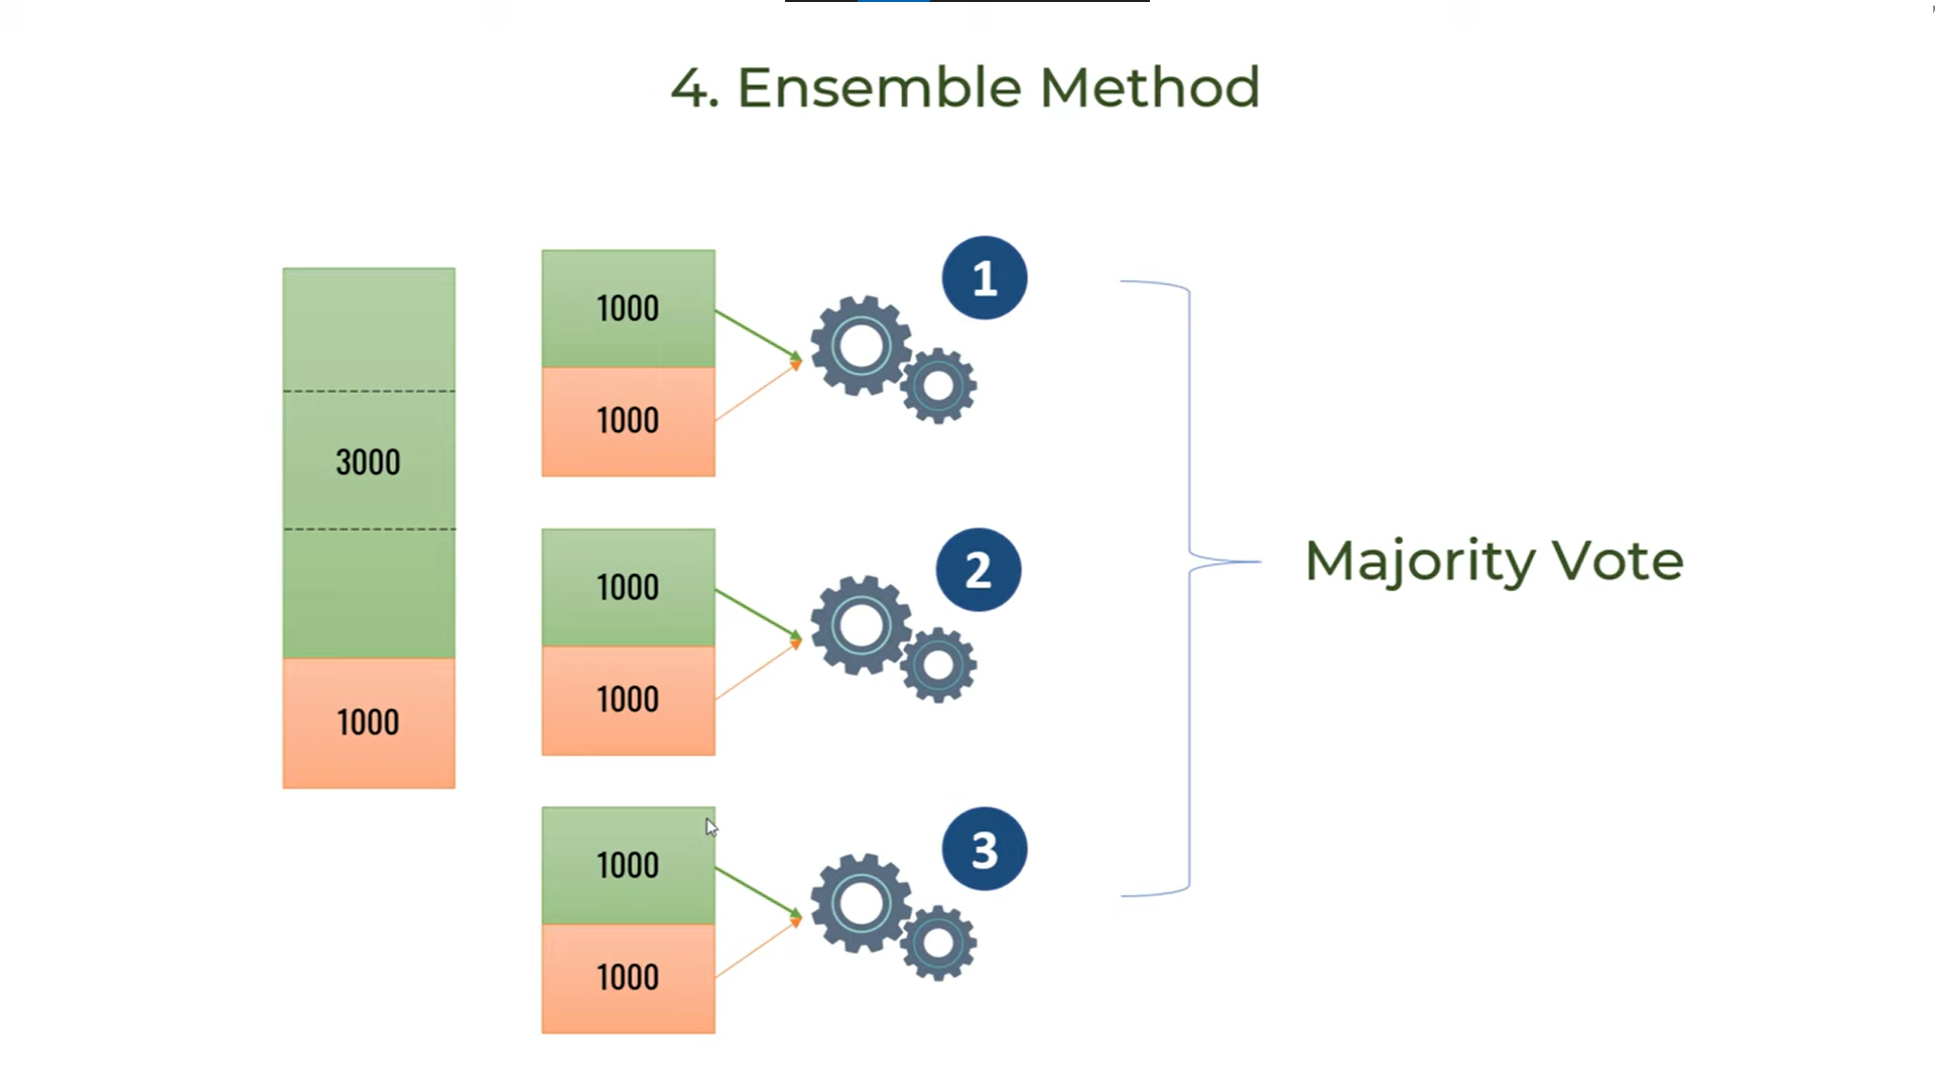
5. Focal loss
1. Focal loss will penalize majority samples during loss
calculation and give more weight to minority class
samples

In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../../Datasets/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.drop('customerID',axis='columns',inplace=True) # Here inplace true will update the dataframe
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] # It will serve as an index and will return all the true values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df1 = df[df.TotalCharges!=" "]
df1.shape , df.shape

((7032, 20), (7043, 20))

In [10]:
# Changing from object to int
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\2337213276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure


In [12]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes == 'object':
            print(f"{columns} - {df[columns].unique()}")

In [13]:
print_unique_col_values(df1)


gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


In [14]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)


gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes']
OnlineBackup - ['Yes' 'No']
DeviceProtection - ['No' 'Yes']
TechSupport - ['No' 'Yes']
StreamingTV - ['No' 'Yes']
StreamingMovies - ['No' 'Yes']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\4006804940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\4006804940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [15]:
yes_no_columns = ['gender','Partner','Dependents' ,'PhoneService', 'MultipleLines' ,'OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection' ,'TechSupport', 'StreamingTV', 'StreamingMovies' ,'PaperlessBilling', 'Churn' ]

for col in yes_no_columns:
    df1[col].replace({"Yes":1,"No":0},inplace=True)

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\166355507.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"Yes":1,"No":0},inplace=True)
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\166355507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes":1,"No":0},inplace=True)
C:\Users\Nabeel\AppData\L

In [16]:
print_unique_col_values(df1)


gender - ['Female' 'Male']
InternetService - ['DSL' 'Fiber optic' 'No']
Contract - ['Month-to-month' 'One year' 'Two year']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [17]:
for columns in df1:
    print(f"{columns} - {df1[columns].unique()}")

gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - [1 0]
Dependents - [0 1]
tenure - [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService - [0 1]
MultipleLines - [0 1]
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - [0 1]
OnlineBackup - [1 0]
DeviceProtection - [0 1]
TechSupport - [0 1]
StreamingTV - [0 1]
StreamingMovies - [0 1]
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - [1 0]
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges - [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges - [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn - [0 1]


In [18]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract', 'PaymentMethod' ],drop_first=True)
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6793,Male,0,1,1,72,1,1,1,1,1,...,108.40,7767.25,0,True,False,False,True,True,False,False
4505,Female,0,1,0,72,1,1,0,0,0,...,26.00,1776.00,0,False,True,False,True,False,False,True
6480,Female,0,0,1,13,1,0,0,0,1,...,53.45,718.10,0,False,False,False,False,False,False,True
4819,Male,0,0,1,53,1,0,0,0,0,...,19.75,1052.35,1,False,True,False,True,False,False,False


In [19]:
df2['gender'].replace({"Female":1,"Male":0},inplace=True)
df2['gender'].unique()

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\3901467604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['gender'].replace({"Female":1,"Male":0},inplace=True)
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\3901467604.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['gender'].re

array([1, 0], dtype=int64)

In [20]:
bools_cols = df2.select_dtypes(include='bool').columns
df2[bools_cols] = df2[bools_cols].astype(int)

In [21]:
cols_to_scale = ['tenure' ,'MonthlyCharges' ,'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


In [23]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

X_train.shape , X_test.shape ,len(X_train.columns)


((5625, 23), (1407, 23), 23)

In [24]:
count_class_0,count_class_1  = df.Churn.value_counts()
count_class_0,count_class_1

(5174, 1869)

In [25]:
df_class_0 = df2[df2.Churn==0]
df_class_1 = df2[df2.Churn==1]

In [26]:
df_class_0.shape,df_class_1.shape

((5163, 24), (1869, 24))

In [27]:
df_class_0_under = df_class_0.sample(count_class_1)

In [29]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape


(3738, 24)

In [31]:
df_test_under.Churn.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [32]:
X = df_test_under.drop("Churn",axis="columns")
y = df_test_under.Churn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y) # Stratify will make sure it has asme no. of values from 0th 1st classes

In [33]:
X_train.shape,X_test.shape

((2990, 23), (748, 23))

In [46]:
from sklearn.metrics import classification_report
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model =  keras.Sequential([
    keras.layers.Dense(23, input_dim=23, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6244 - loss: 0.6607
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7417 - loss: 0.5403
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7578 - loss: 0.4978
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7692 - loss: 0.4844
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7727 - loss: 0.4707
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - loss: 0.4762
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7647 - loss: 0.4821
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7811 - loss: 0.4594
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7736 - loss: 0.4726
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7788 - loss: 0.4716
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7776 - loss: 0.4645
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

In [48]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       374
           1       0.73      0.73      0.73       374

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



>>>>>> # Oversampling 

In [50]:
count_class_0,count_class_1

(5174, 1869)

In [51]:
df_class_0.shape,df_class_1.shape

((5163, 24), (1869, 24))

In [63]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True) # Here the replace argument will randomly pick samples and copy them to add more
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

(10337, 24)

In [64]:
df_test_over.Churn.value_counts()

Churn
1    5174
0    5163
Name: count, dtype: int64

In [65]:
X = df_test_over.drop("Churn",axis="columns")
y = df_test_over.Churn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y) # Stratify will make sure it has asme no. of values from 0th 1st classes

In [66]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6447 - loss: 0.6229
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7704 - loss: 0.4831
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7716 - loss: 0.4788
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7756 - loss: 0.4696
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7814 - loss: 0.4584
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7813 - loss: 0.4689
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7738 - loss: 0.4745
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7811 - loss: 0.4608
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7829 - loss: 0.4575
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7792 - loss: 0.4552
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7824 - loss: 0.4577
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [67]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1033
           1       0.74      0.84      0.78      1035

    accuracy                           0.77      2068
   macro avg       0.77      0.77      0.77      2068
weighted avg       0.77      0.77      0.77      2068



In [80]:
X = df2.drop("Churn",axis='columns')
y = df2.Churn

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
X_sm,y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=1,stratify=y_sm)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6492 - loss: 0.6255
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7890 - loss: 0.4647
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7865 - loss: 0.4541
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7833 - loss: 0.4641
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7925 - loss: 0.4399
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7878 - loss: 0.4454
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7905 - loss: 0.4461
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7979 - loss: 0.4364
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7927 - loss: 0.4407
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7998 - loss: 0.4348
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7914 - loss: 0.4393
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [85]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1033
           1       0.78      0.83      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



# Method 4 Use of ensemble with undersampling

In [86]:
X = df2.drop("Churn",axis='columns')
y = df2.Churn

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [88]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [89]:
4130/1495

2.762541806020067

Its almost 3 so we need to devide our batch in to 3 classes

In [90]:
4130/3

1376.6666666666667

In [91]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [92]:
df3_class_0 = df3[df3.Churn == 0]
df3_class_1 = df3[df3.Churn == 1]

In [93]:
df3_class_0.shape ,  df3_class_1.shape

((4130, 24), (1495, 24))

In [94]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train = df_train.drop("Churn",axis='columns')
    y_train = df_train.Churn
    return X_train,y_train


In [96]:
X_train,y_train = get_train_batch(df3_class_0,df3_class_1,0,1495)
X_train.shape

(2990, 23)

In [97]:
y_preds1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6492 - loss: 0.6542
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7507 - loss: 0.5307
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7736 - loss: 0.4911
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7838 - loss: 0.4661
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7735 - loss: 0.4874
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7651 - loss: 0.4854
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7744 - loss: 0.4714
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7668 - loss: 0.4747
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7818 - loss: 0.4696
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7827 - loss: 0.4532
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7754 - loss: 0.4532
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accu

In [102]:
X_train,y_train = get_train_batch(df3_class_0,df3_class_1,1495,2990)
y_preds2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5752 - loss: 0.6689
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7396 - loss: 0.5360
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7577 - loss: 0.4928
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7517 - loss: 0.4978
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7621 - loss: 0.4832
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7550 - loss: 0.4882
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7651 - loss: 0.4721
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7699 - loss: 0.4747
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7701 - loss: 0.4869
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7677 - loss: 0.4781
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7719 - loss: 0.4715
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [103]:
X_train,y_train = get_train_batch(df3_class_0,df3_class_1,2990,4130)
y_preds3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6209 - loss: 0.6582
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7441 - loss: 0.5658
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7712 - loss: 0.4999
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7784 - loss: 0.4753
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7512 - loss: 0.5031
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7725 - loss: 0.4818
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7663 - loss: 0.4882
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7686 - loss: 0.4776
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7778 - loss: 0.4630
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7889 - loss: 0.4559
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7904 - loss: 0.4696
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7723 -

In [104]:
y_pred_final = y_preds1.copy()

for i in range(len(y_preds1)):
    n_ones = y_preds1[i] + y_preds2[i] + y_preds3[i]
    if n_ones>1:y_pred_final[i] = 1
    else:y_pred_final[i] = 0


In [105]:
y_pred_final

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [111]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



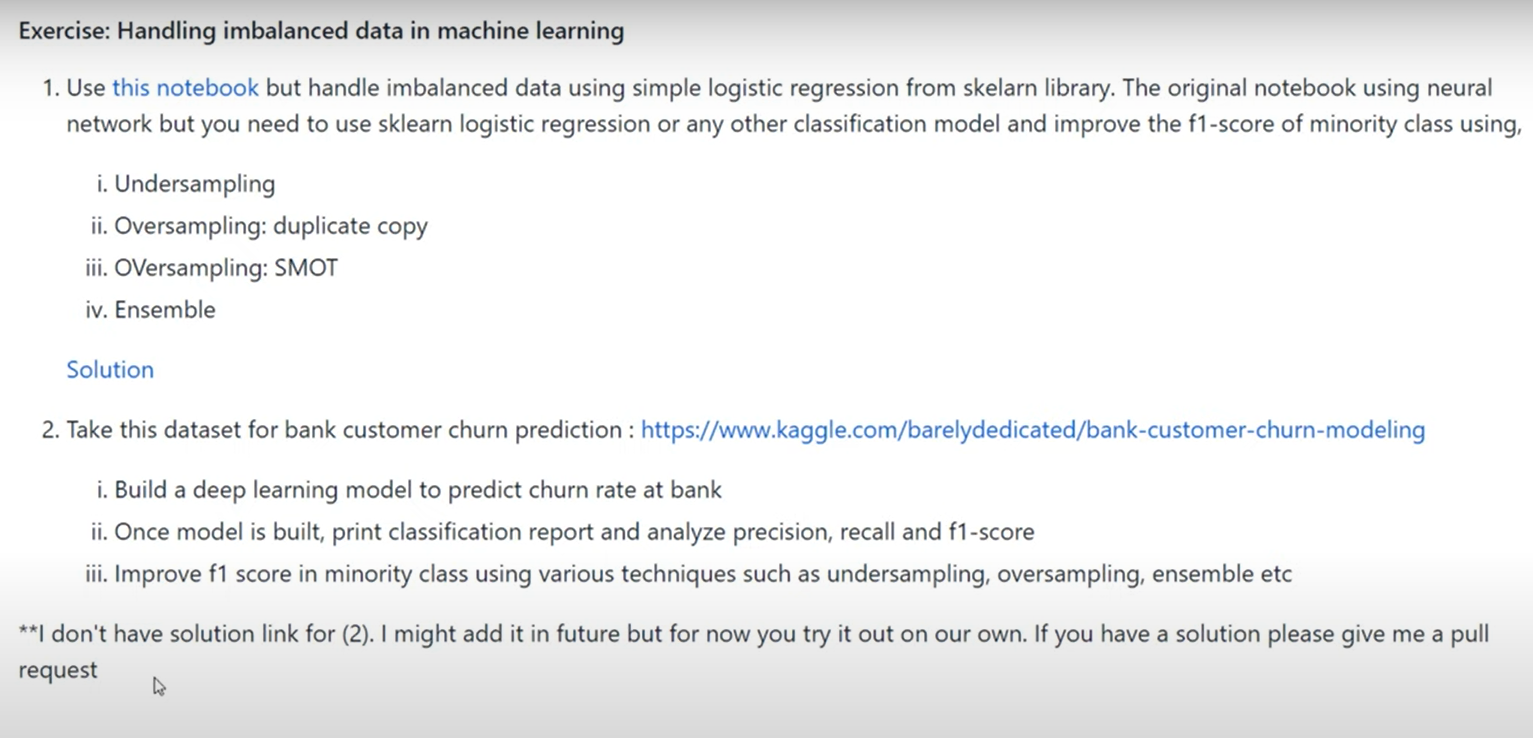

In [110]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_sm,y_sm)
model.score(X_test,y_test)

0.7505330490405118

In [112]:
# Solution 2
df = pd.read_csv("../Datasets\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [113]:
df.drop("customerID",axis='columns',inplace=True)

In [123]:
def print_unique_values(df):
    for columns in df.columns:
        if df[columns].dtypes == 'object':
            print(columns,df[columns].unique())

print_unique_values(df)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [117]:
cols_to_change_yes_no = ['Partner' ,'Dependents', 'PhoneService' ,'MultipleLines', 'OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection' ,'TechSupport' ,'StreamingTV', 'StreamingMovies' ,'PaperlessBilling', 'Churn' ]

In [118]:
cols_to_remove_extra_no = ['OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection' ,'TechSupport', 'StreamingTV' ,'StreamingMovies' ]

In [121]:
for cols in cols_to_remove_extra_no:
    df[cols] = df[cols].replace('No internet service','No')
    print(cols,df[cols].unique())

OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']


In [124]:
df['MultipleLines'] = df['MultipleLines'].replace("No phone service","No")

In [125]:
print(print_unique_values(df))

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']
None


In [129]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [132]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [135]:
df1 = df[df.TotalCharges!=" "]
df1.shape , df.shape

((7032, 20), (7043, 20))

In [142]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\62923673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [143]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [144]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [147]:
for cols in df1.columns:
    if df[cols].dtypes == "object":
        print(cols,df[cols].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [150]:
yes_no_columns = ['gender','Partner','Dependents' ,'PhoneService', 'MultipleLines' ,'OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection' ,'TechSupport', 'StreamingTV', 'StreamingMovies' ,'PaperlessBilling', 'Churn' ]
for cols in yes_no_columns:
    df1[cols] = df1[cols].replace({"Yes":1,"No":0})


C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\4234963992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols] = df1[cols].replace({"Yes":1,"No":0})
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\4234963992.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[cols] = df1[cols].replace({"Yes":1,"No":0})


In [154]:
[f"{cols} {df[cols].unique()}" for cols in df.columns]

["gender ['Female' 'Male']",
 'SeniorCitizen [0 1]',
 'Partner [1 0]',
 'Dependents [0 1]',
 'tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27\n  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68\n 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0\n 39]',
 'PhoneService [0 1]',
 'MultipleLines [0 1]',
 "InternetService ['DSL' 'Fiber optic' 'No']",
 'OnlineSecurity [0 1]',
 'OnlineBackup [1 0]',
 'DeviceProtection [0 1]',
 'TechSupport [0 1]',
 'StreamingTV [0 1]',
 'StreamingMovies [0 1]',
 "Contract ['Month-to-month' 'One year' 'Two year']",
 'PaperlessBilling [1 0]',
 "PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'\n 'Credit card (automatic)']",
 'MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]',
 "TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']",
 'Churn [0 1]']

In [155]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract', 'PaymentMethod' ],drop_first=True)
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6353,Male,0,1,0,10,1,0,1,0,0,...,54.95,568.85,0,False,False,False,False,True,False,False
2777,Male,0,0,0,10,1,0,0,0,0,...,20.00,185.40,0,False,True,False,False,False,True,False
1073,Male,0,0,0,7,1,1,0,0,1,...,98.05,713.00,1,True,False,False,False,False,False,False
2806,Male,0,1,0,58,1,1,1,1,1,...,86.10,4890.50,0,False,False,False,True,False,True,False


In [157]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [158]:
df2['gender'].replace({"Female":1,"Male":0},inplace=True)
df2['gender'].unique()

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\3901467604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['gender'].replace({"Female":1,"Male":0},inplace=True)
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_4724\3901467604.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['gender'].re

array([1, 0], dtype=int64)

In [159]:
bools_cols = df2.select_dtypes(include='bool').columns
df2[bools_cols] = df2[bools_cols].astype(int)

In [160]:
df2.dtypes # ALL of them are now numbers

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_One year                          int32
Contract_Two year   

In [161]:
cols_to_scale = ['tenure' ,'MonthlyCharges' ,'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [162]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


In [163]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [167]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [168]:
model = keras.Sequential([
    keras.layers.Dense(23,input_shape=(23,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
model.fit(X_train,y_train,epochs=30,validation_split=0.1)


Epoch 1/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7480 - loss: 0.5218 - val_accuracy: 0.7833 - val_loss: 0.4467
Epoch 2/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7820 - loss: 0.4365 - val_accuracy: 0.7851 - val_loss: 0.4301
Epoch 3/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7955 - loss: 0.4210 - val_accuracy: 0.7922 - val_loss: 0.4246
Epoch 4/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7945 - loss: 0.4248 - val_accuracy: 0.7922 - val_loss: 0.4216
Epoch 5/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8049 - loss: 0.4243 - val_accuracy: 0.7975 - val_loss: 0.4203
Epoch 6/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8017 - loss: 0.4215 - val_accuracy: 0.7940 - val_loss: 0.4184
Epoch 7/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7994 - loss: 0.4197 - val_accuracy: 0.7940 - val_loss: 0.4171
Epoch 8/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8102 - loss: 0.4137 - val_accuracy: 0.

In [170]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7971 - loss: 0.4306


[0.42255479097366333, 0.8002842664718628]

In [171]:
df_class_0 = df2[df2.Churn==0]
df_class_1 = df2[df2.Churn==1]
df_class_0.shape,df_class_1.shape


((5163, 24), (1869, 24))

In [172]:
df_class_0_under = df_class_0.sample(count_class_1)

In [173]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape


(3738, 24)

In [174]:
df_test_under.Churn.value_counts()


Churn
0    1869
1    1869
Name: count, dtype: int64

In [175]:
X = df_test_under.drop("Churn",axis="columns")
y = df_test_under.Churn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y) # Stratify will make sure it has asme no. of values from 0th 1st classes